In [49]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [33]:
#load dataset
df = pd.read_csv("kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
#create new feature :House Age
CURRENT_YEAR = 2025
df['house_age'] = CURRENT_YEAR - df['yr_built']
df[["yr_built", "house_age"]].head()


,yr_built,house_age
0,1955,70
1,1951,74
2,1933,92
3,1965,60
4,1987,38


In [ ]:
#Create Price per Square Foot(new feature)
df['price_per_sqft'] = df['price'] / df['sqft_living']
df[["price", "sqft_living", "price_per_sqft"]].head()

,price,sqft_living,price_per_sqft
0,221900.0,1180,188.050847
1,538000.0,2570,209.338521
2,180000.0,770,233.766234
3,604000.0,1960,308.163265
4,510000.0,1680,303.571429


In [ ]:
#Encode categorical features

categorical_cols = ["zipcode", "condition"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,condition_2,condition_3,condition_4,condition_5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,False,False,True,False,False,False,False,True,False,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,False,False,False,False,False,False,False,True,False,False


In [23]:
#separate features and target

x = df.drop ("price" , axis=1)
y =df["price"]

In [24]:
#keeping only numeric features

X =X.select_dtypes(include=['int64', 'float64'])
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,price_per_sqft
0,7129300520,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,47.5112,-122.257,1340,5650,70,188.050847
1,6414100192,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,74,209.338521
2,5631500400,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,47.7379,-122.233,2720,8062,92,233.766234
3,2487200875,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,47.5208,-122.393,1360,5000,60,308.163265
4,1954400510,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,47.6168,-122.045,1800,7503,38,303.571429


In [26]:
#train-test split
 
X_train , X_test, y_train,y_test = train_test_split(
    X, y,test_size=0.2, random_state=42
)


In [ ]:
#train linear regression model
lr =LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#feature using coefficients
importance_lr = pd.Series(
    lr.coef_,
    index=X.columns
).sort_values(key=abs ,ascending=False)

importance_lr.head(10)

waterfront        230839.362073
lat               -65139.408713
floors            -22561.517440
grade              19365.764165
bathrooms          17959.860503
view               13670.681510
long               11385.952788
price_per_sqft      2006.761764
bedrooms           -1042.392330
sqft_living          193.643419
dtype: float64

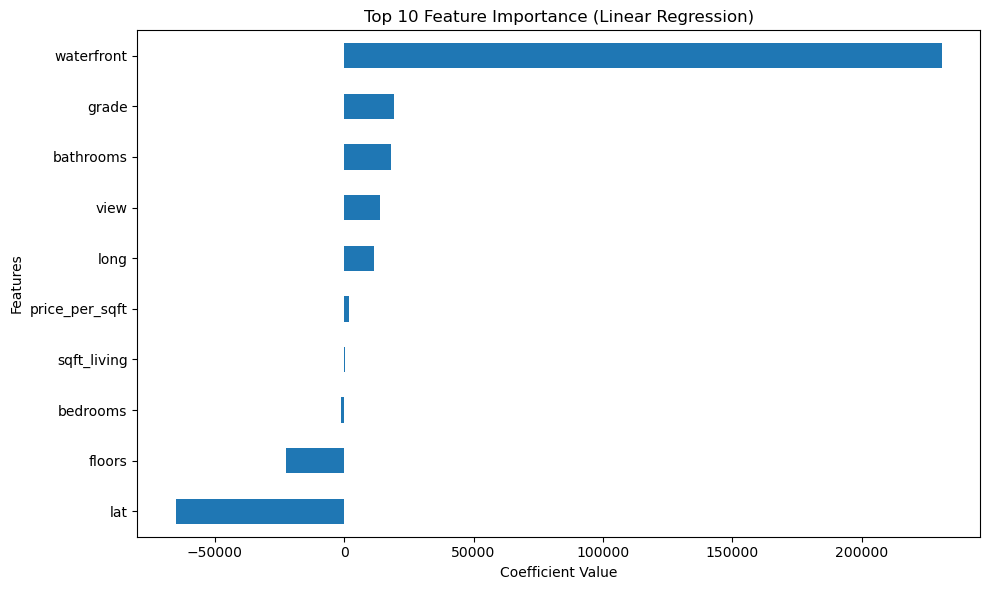

In [55]:
# Select top 10 important features
top_lr = importance_lr.head(10)

plt.figure(figsize=(10, 6))
top_lr.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importance (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
#using tree model 

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_importance = pd.Series(
    dt.feature_importances_, index=X.columns
).sort_values(ascending=False)

dt_importance.head(10)

grade             0.322972
price_per_sqft    0.319614
sqft_living       0.285506
lat               0.067186
view              0.001625
sqft_above        0.001103
sqft_lot15        0.000534
sqft_living15     0.000408
bathrooms         0.000266
long              0.000194
dtype: float64

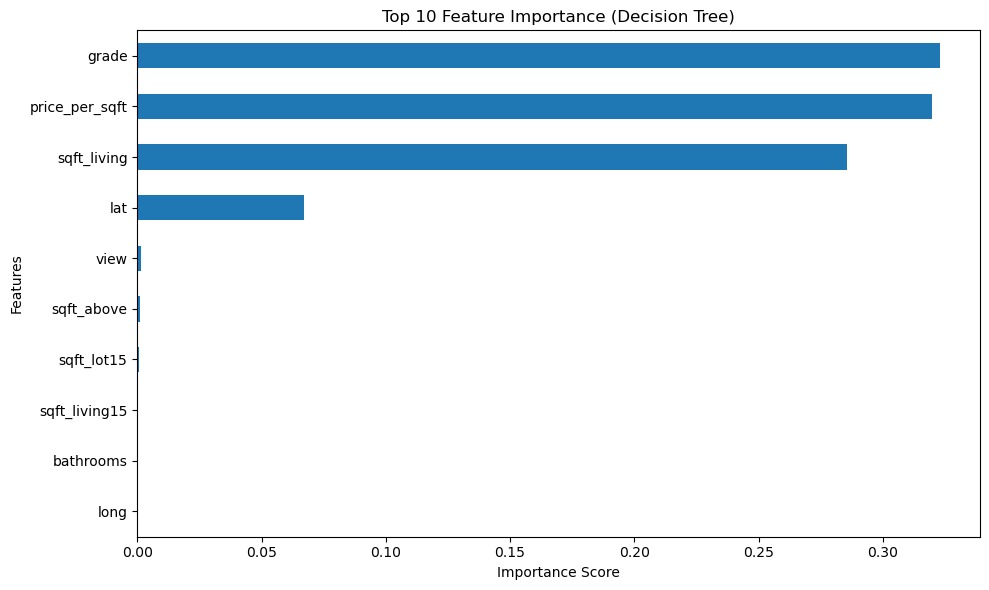

In [53]:
# Select top 10 tree features
top_dt = dt_importance.head(10)
plt.figure(figsize=(10, 6))
top_dt.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


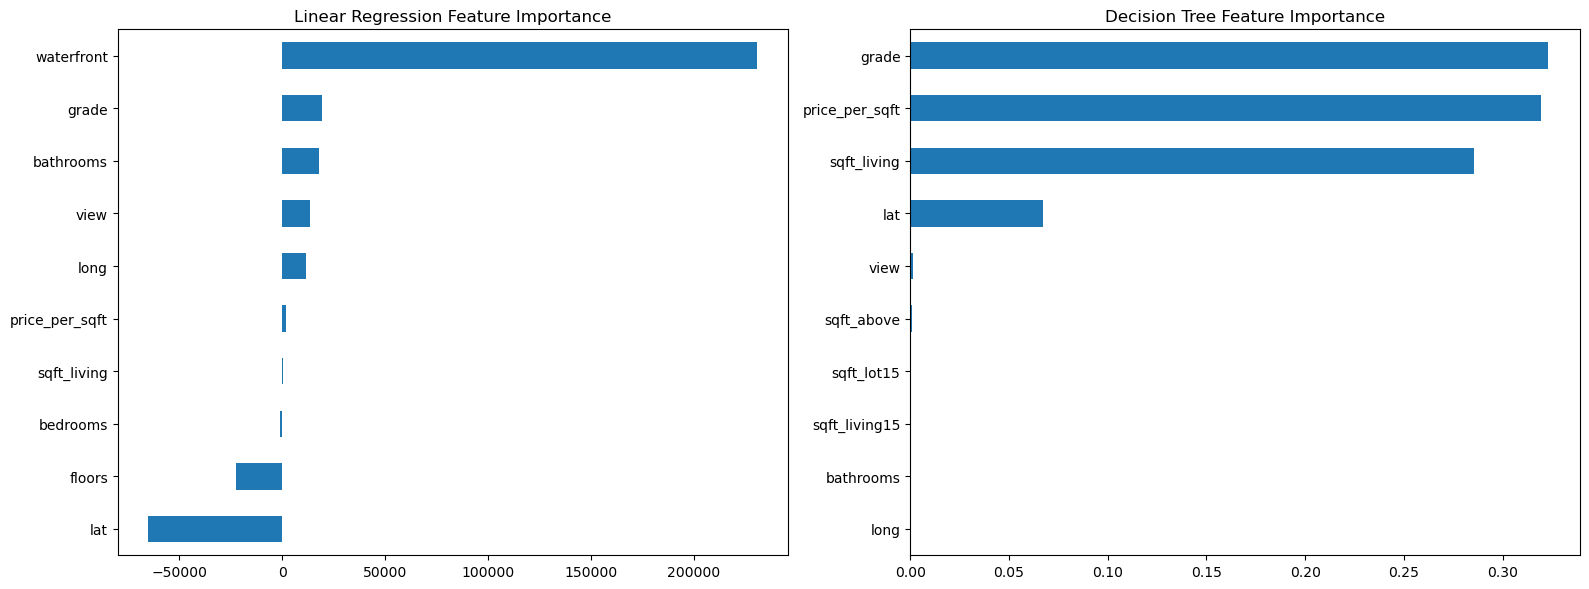

In [ ]:
#Both linear & Decision  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_lr.sort_values().plot(kind='barh', ax=axes[0])
axes[0].set_title("Linear Regression Feature Importance")

top_dt.sort_values().plot(kind='barh', ax=axes[1])
axes[1].set_title("Decision Tree Feature Importance")

plt.tight_layout()
plt.show()
